## Exploring the Data Provided by Quartix

# Data Format
* Categorised Data
    * 95 Examples, 16 Crashes, 79 Not Crashes
* Uncategorised Data
    * 406 Examples, unlabelled incidents
* Unlinked Data
    * Reduced amount of data on 6071 incidents

In [1]:
from extract_data import *

# Import the code using pickle

cat_data = load_list('pickle_data', 'cat_data')
uncat_data = load_list('pickle_data', 'uncat_data')
unlinked_data = load_list('pickle_data', 'unlinked_data')

C:\Users\chris\anaconda3\envs\MDMvenv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chris\anaconda3\envs\MDMvenv\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\chris\anaconda3\envs\MDMvenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


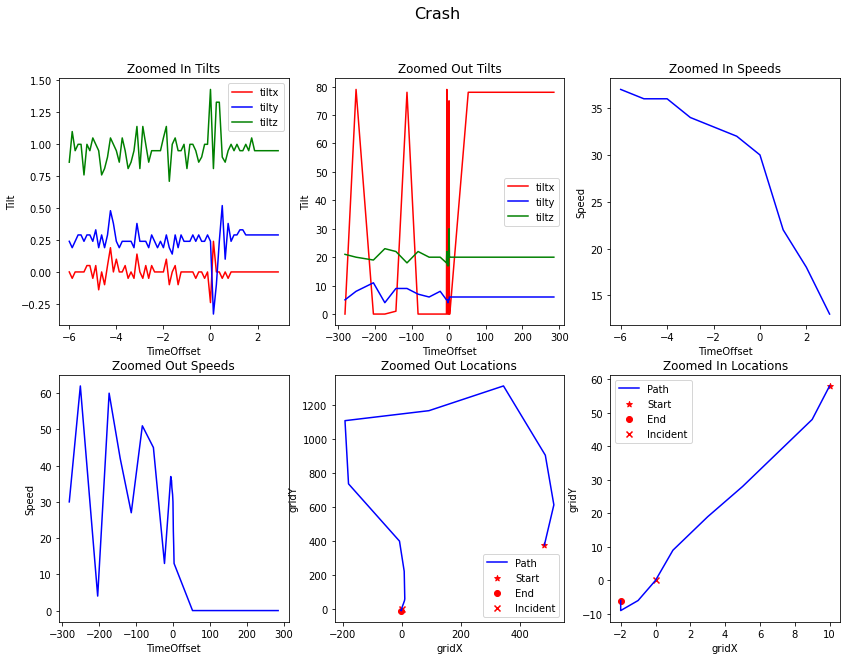

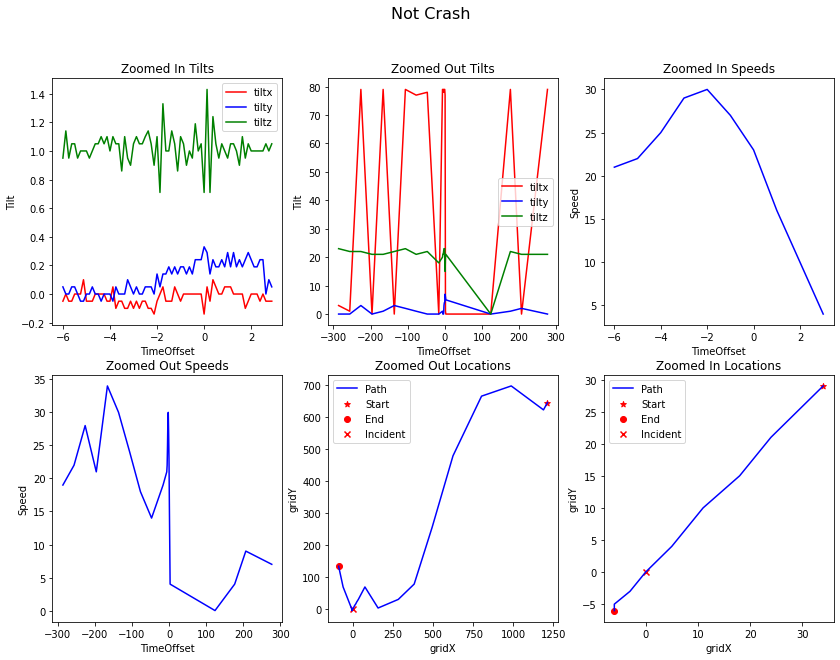

In [2]:
# Get example incident and plot

crash = cat_data[0]
not_crash = cat_data[30]
plot_example(crash, 'Crash')
plot_example(not_crash, 'Not Crash')

## Accelerometer Data Analysis

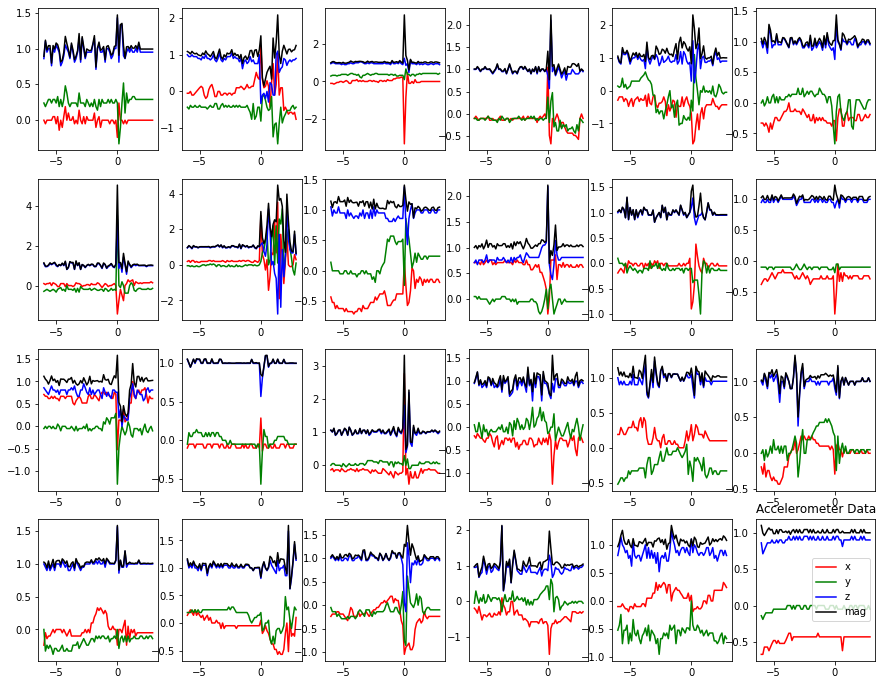

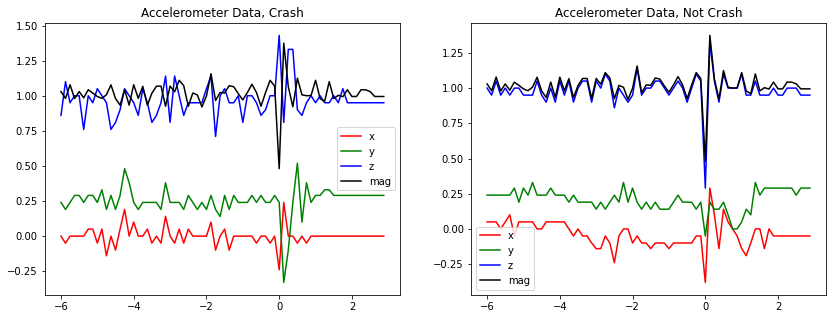

In [105]:
import random as rand

# Get the tilts for cat_data and plot an example crash and exameple not crash
crash_no = 0
no_crash_no = 40

all_tilts = get_tilt_timeseries(cat_data)
crash_tilts = all_tilts[crash_no,:,:]
no_crash_tilts = all_tilts[no_crash_no,:,:]
tilt_mags = get_mags(all_tilts)

colours = ['r','g','b']
labels = ['x','y','z']

timeoffset = np.linspace(-6,2.875,72)

fig=plt.figure(figsize=(15,12)), 
for k in range(24):
    plt.subplot(4,6,k+1)
    for i in range(3):
        plt.plot(timeoffset, all_tilts[k,:,i], c=colours[i], label = labels[i])
    plt.plot(timeoffset, tilt_mags[k], c='black', label='mag')
plt.legend(loc='best'), plt.title('Accelerometer Data') 
plt.show()

fig = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
for i in range(3):
    plt.plot(timeoffset, crash_tilts[:,i], c=colours[i], label = labels[i])
plt.plot(timeoffset, tilt_mags[no_crash_no], c='black', label='mag')
plt.legend(loc='best'), plt.title('Accelerometer Data, Crash') 
plt.subplot(1,2,2)
for i in range(3):
    plt.plot(timeoffset, no_crash_tilts[:,i], c=colours[i], label = labels[i])
plt.plot(timeoffset, tilt_mags[no_crash_no], c='black', label='mag')
plt.legend(loc='best'), plt.title('Accelerometer Data, Not Crash') 
plt.show()

## PCA on Tilt Magnitudes

60 components explain 0.9525316446818398 percent of the data


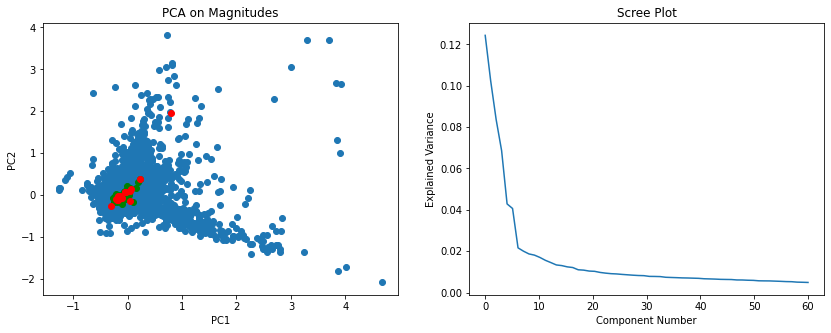

In [110]:
from sklearn.decomposition import PCA

# Get unlinked tilts
all_tilts = get_tilt_timeseries(unlinked_data)
all_mags = get_mags(all_tilts)

# Get labelled tilts
test_tilts = get_tilt_timeseries(cat_data)
test_mags = get_mags(test_tilts)
labels = np.array(get_labels(cat_data))
crash_ref = labels.nonzero()
nocrash_refs = (-1*(labels-1)).nonzero()

# Init PCA
n_components = 60
pca = PCA(n_components=n_components)

pca_mags = pca.fit_transform(all_mags)
pca_test_mags = pca.transform(test_mags)

# Plotting
fig=plt.figure(figsize=(14,5)), plt.subplot(1,2,1)
plt.scatter(pca_mags[:,0], pca_mags[:,1])
plt.scatter(pca_test_mags[nocrash_refs, 0], pca_test_mags[nocrash_refs, 1], color='green')
plt.scatter(pca_test_mags[crash_ref, 0], pca_test_mags[crash_ref, 1], color='red')
plt.xlabel('PC1'), plt.ylabel('PC2'), plt.title('PCA on Magnitudes')
plt.subplot(1,2,2)
plt.plot(np.linspace(0,n_components,n_components), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance'), plt.xlabel('Component Number'), plt.title('Scree Plot')

print(len(pca.explained_variance_ratio_),'components explain', sum(pca.explained_variance_ratio_), 'percent of the data')


## PCA on Individual Directions

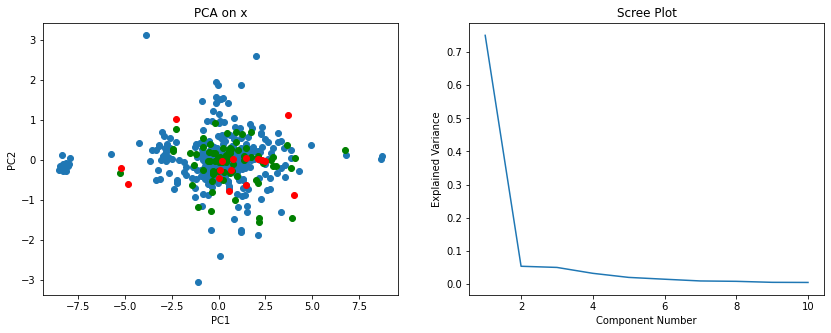

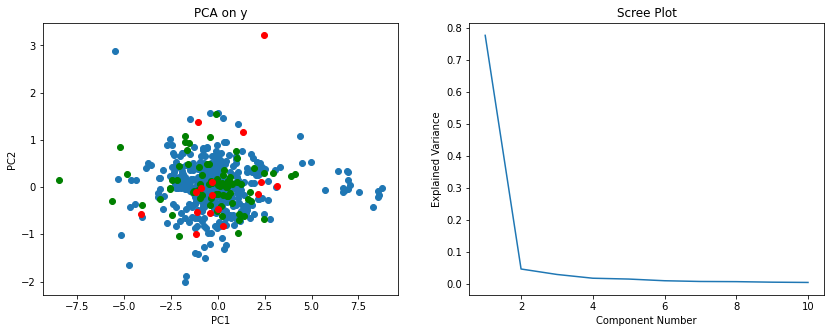

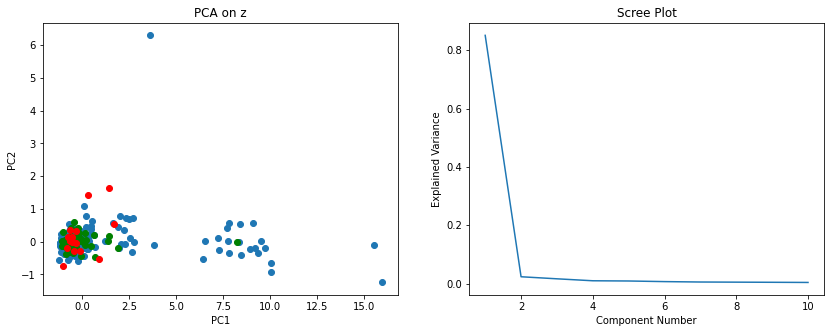

In [126]:
all_tilts = get_tilt_timeseries(uncat_data)
x_tilts = all_tilts[:,:,0]
y_tilts = all_tilts[:,:,1]
z_tilts = all_tilts[:,:,2]
tilts = [x_tilts,y_tilts,z_tilts]

test_tilts = get_tilt_timeseries(cat_data)
test_tilt_x = test_tilts[:,:,0]
test_tilt_y = test_tilts[:,:,1]
test_tilt_z = test_tilts[:,:,2]
test_tilts = [test_tilt_x, test_tilt_y, test_tilt_z]

dirs = ['x','y','z']

for i in range(3):
    # Init PCA
    n_components = 10
    pca = PCA(n_components=n_components)
    pca_tilts = pca.fit_transform(tilts[i])
    pca_test_tilts = pca.transform(test_tilts[i])

    # Plotting
    fig=plt.figure(figsize=(14,5)), plt.subplot(1,2,1)
    plt.scatter(pca_tilts[:,0], pca_tilts[:,1])
    plt.xlabel('PC1'), plt.ylabel('PC2'), plt.title('PCA on '+  dirs[i])
    plt.scatter(pca_test_tilts[nocrash_refs, 0], pca_test_tilts[nocrash_refs, 1], color='green')
    plt.scatter(pca_test_tilts[crash_ref, 0], pca_test_tilts[crash_ref, 1], color='red')
    plt.subplot(1,2,2)
    plt.plot(np.linspace(1,n_components,n_components), pca.explained_variance_ratio_)
    plt.ylabel('Explained Variance'), plt.xlabel('Component Number'), plt.title('Scree Plot')

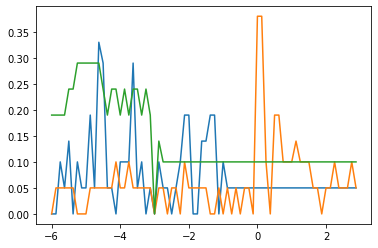

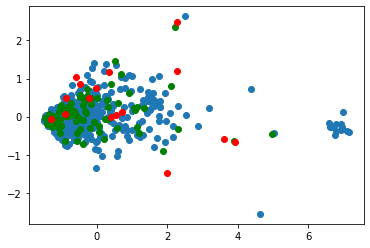

[0.73898291 0.05742142 0.04094481 0.02640845]
0.4631578947368421
[[38  1 15  1 11 13]
 [ 2  1  3  1  3  6]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


C:\Users\chris\anaconda3\envs\MDMvenv\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 95 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


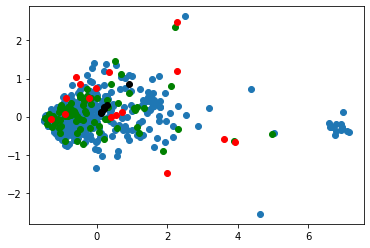

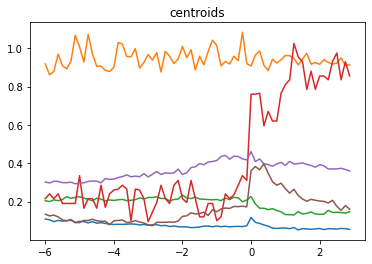

In [127]:
from tslearn.clustering import TimeSeriesKMeans
from metrics import *
from sklearn.metrics import confusion_matrix

train_tilts = get_tilt_timeseries(uncat_data)
train_tilts = train_tilts[:,:,:1] # remove z axis
train_mags = get_mags(train_tilts)

test_tilts = get_tilt_timeseries(cat_data)
test_tilts = test_tilts[:,:,:1] # remove z axis
test_mags = get_mags(test_tilts)
y = get_labels(cat_data)

for i in range(3):
    plt.plot(timeoffset, train_mags[i,:])
plt.show()

pca = PCA(n_components=4)
pca.fit(train_mags)
train_mags_pca = pca.transform(train_mags)
test_mags_pca = pca.transform(test_mags)

plt.scatter(train_mags_pca[:,0], train_mags_pca[:,1])
plt.scatter(test_mags_pca[nocrash_refs,0], test_mags_pca[nocrash_refs,1], c='green')
plt.scatter(test_mags_pca[crash_ref,0], test_mags_pca[crash_ref,1], c='red')
plt.show()
print(pca.explained_variance_ratio_)

km = TimeSeriesKMeans(6)
km.fit(train_mags)
y_pred = km.predict(test_mags)
print(acc(np.array(y), np.array(y_pred)))
print(confusion_matrix(y, y_pred))
centroids = km.cluster_centers_
centroids = np.reshape(centroids, (6,72))

centroids_pca = pca.transform(centroids)
plt.scatter(train_mags_pca[:,0], train_mags_pca[:,1])
plt.scatter(test_mags_pca[nocrash_refs,0], test_mags_pca[nocrash_refs,1], c='green')
plt.scatter(test_mags_pca[crash_ref,0], test_mags_pca[crash_ref,1], c='red')
plt.scatter(centroids[:,0], centroids[:,1], c='black')
plt.show()

for i in range(6):
    plt.plot(timeoffset, centroids[i,:])
plt.title('centroids')
plt.show()